# This notebook compares the V15 and V20 prediction errors for different bitstrings/categories

### Load the data

In [1]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')

### Create a plotting function

In [88]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    #ax.scatter(180,0,c='k')

    #ax.set_xlim(-180,180)
    
    
    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

## Lake

,latitude_ERA,longitude_ERA,delta
71529,24.028095,69.0000,5.123649
101086,41.170945,-113.4000,4.876928
89090,34.145187,6.0800,2.532175
100584,40.889915,-113.4000,1.885526
42468,1.264637,-50.0625,1.491314


-0.77033347

546

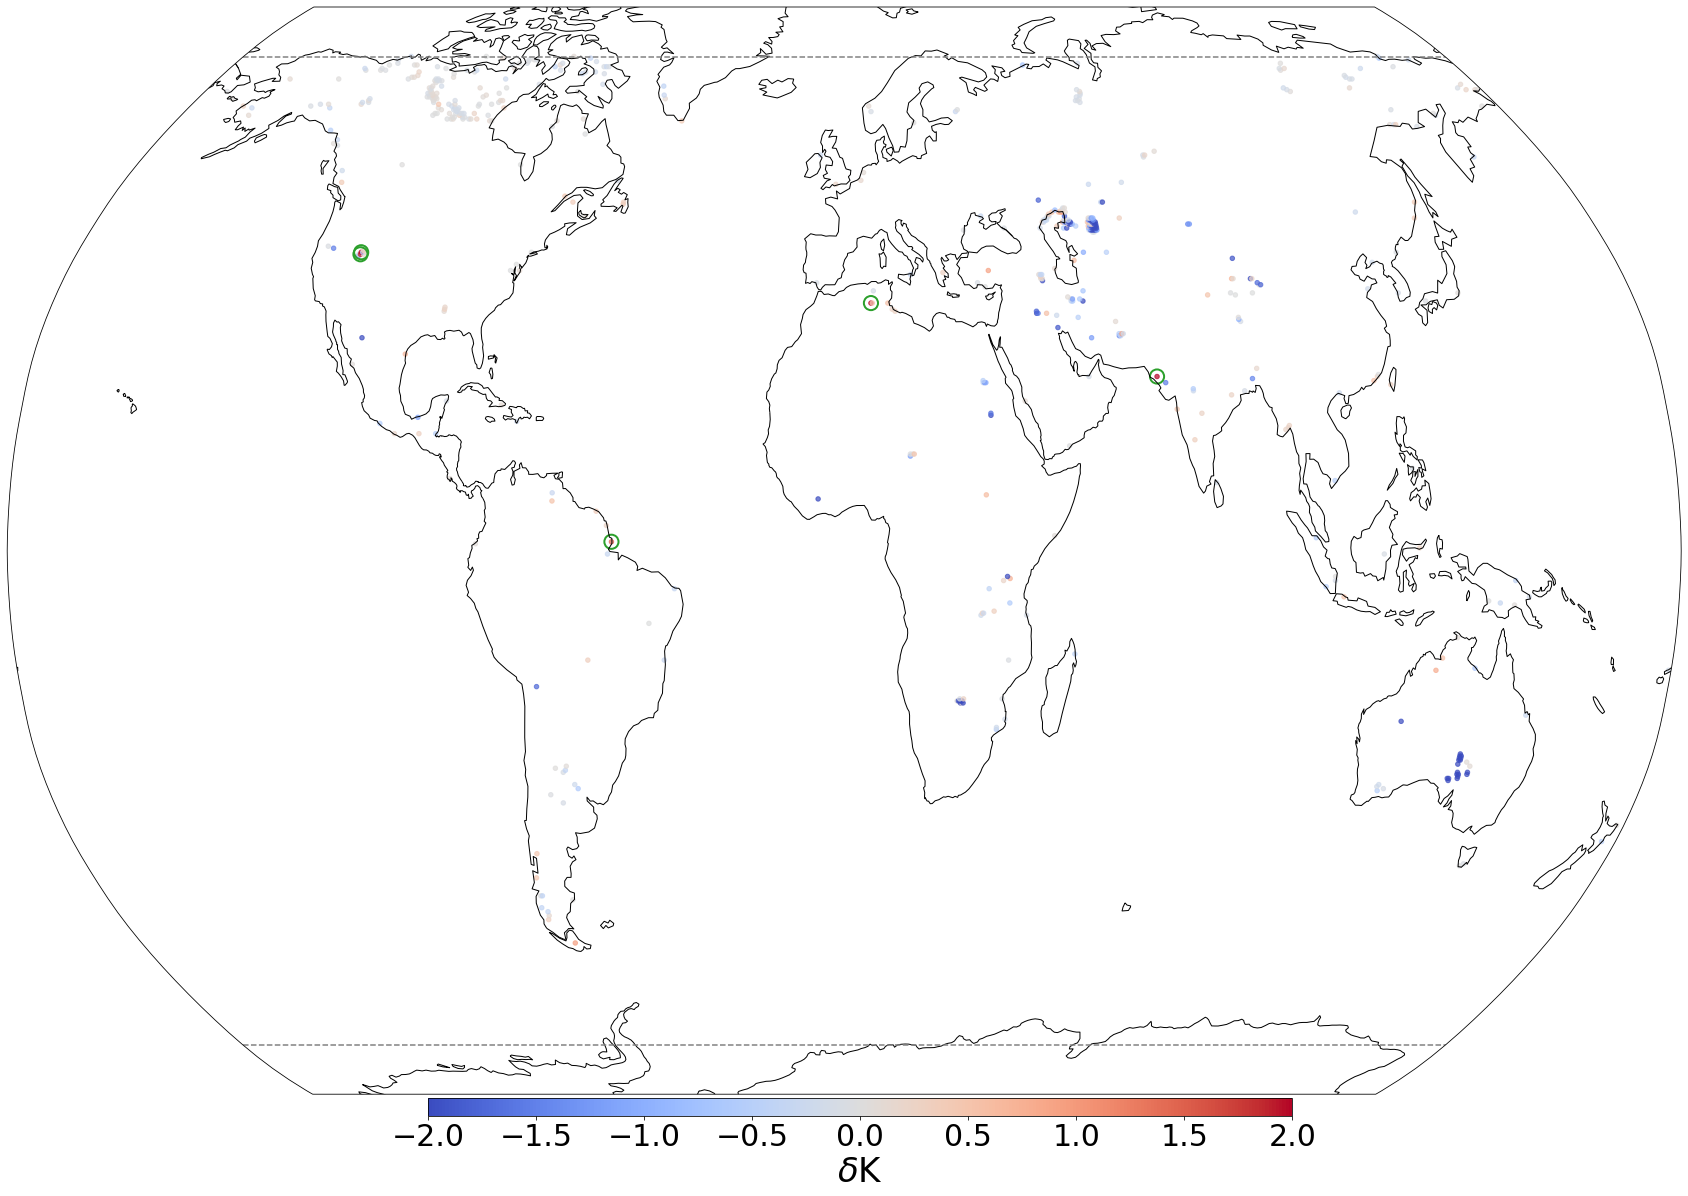

In [139]:
df_lake = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')

n = 5
RobinsonPlot(df_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/lake.png',ncircles=n)
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake.delta.mean())
display(len(df_lake))

## Vegetation

,latitude_ERA,longitude_ERA,delta
42657,1.264637,121.218750,14.226904
30658,-8.852456,120.656250,11.929180
141003,64.215421,23.750000,10.646625
89842,34.426218,131.333333,9.833805
69458,22.903974,-83.400000,9.756284


3.089121

58

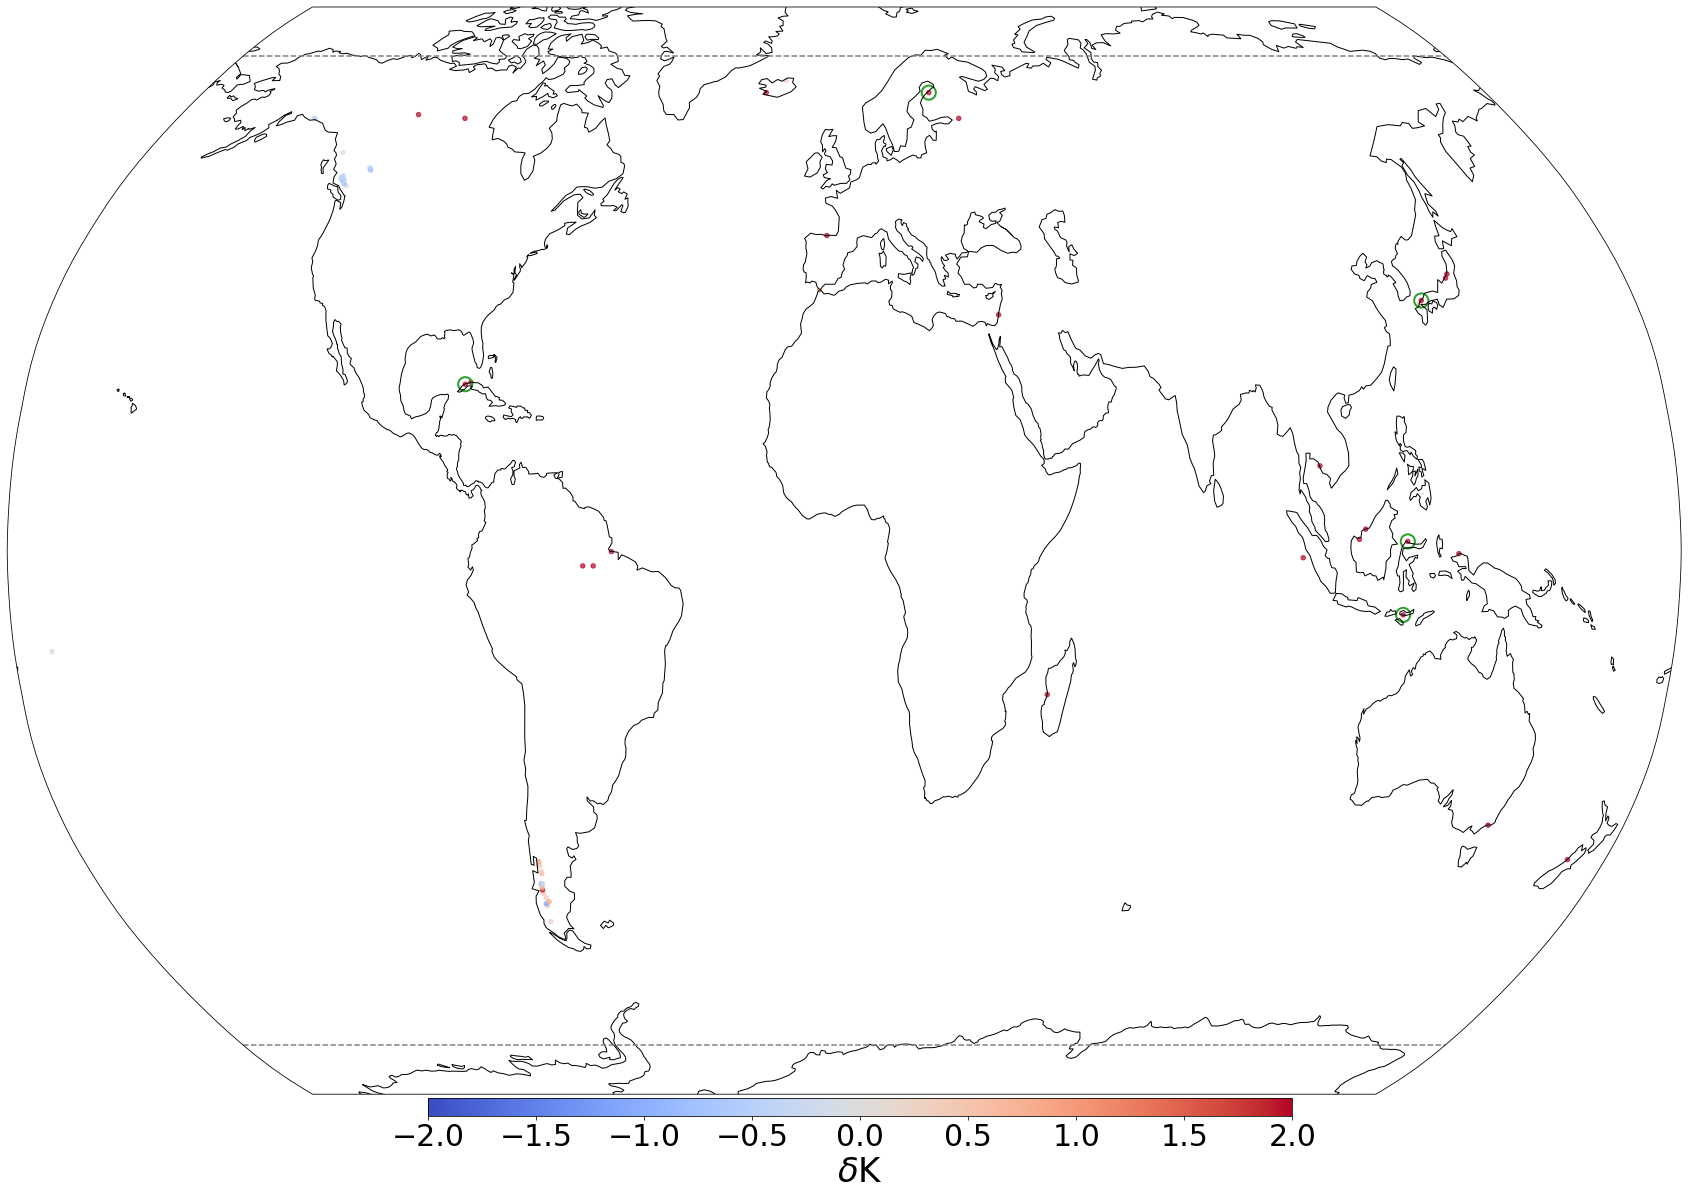

In [141]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant ')

n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_veg.delta.mean())
display(len(df_veg))

## Ice

,latitude_ERA,longitude_ERA,delta,V15_si10Fr,V20_si10Fr,V15_oceanFr,V20_oceanFr,V15_clFr,V20_clFr
133962,59.999970,-141.866667,4.654447,0.072272,0.276917,0.561608,4.777379e-01,0.000000,0.001210
2659,-49.320823,69.166667,3.111953,0.000000,0.595367,0.000000,2.351046e-03,0.020383,0.056965
145090,66.744690,-65.333333,2.798009,0.955537,0.666779,0.000000,0.000000e+00,0.009865,0.018874
89231,34.145187,76.480000,2.705089,0.162598,0.046448,0.000000,4.656613e-10,0.000000,0.002123
2131,-65.058510,-60.000000,2.208425,0.749929,0.417450,0.016069,5.737692e-01,0.000000,0.000204


-0.12768228

1057

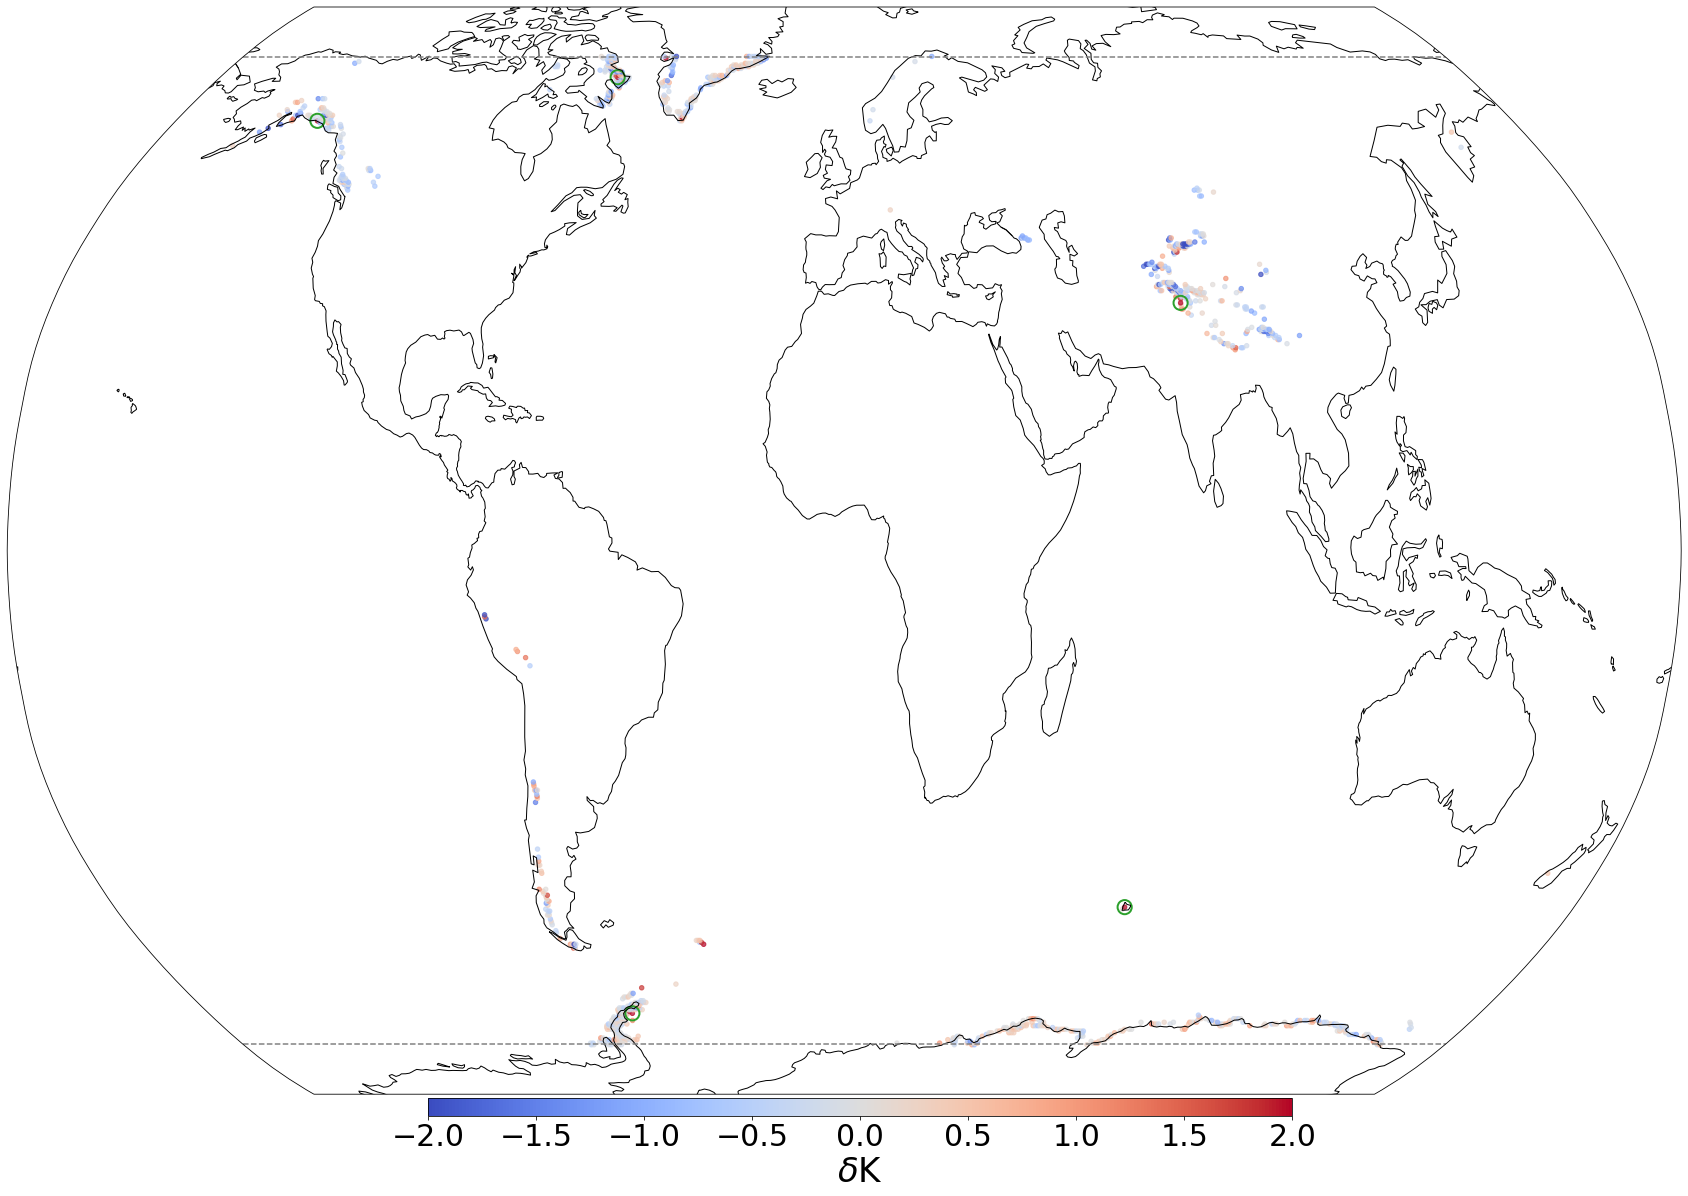

In [142]:
df_ice = df.query('si10Fr_change_is_significant ')
n = 5
RobinsonPlot(df_ice,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta','V15_si10Fr','V20_si10Fr','V15_oceanFr','V20_oceanFr','V15_clFr','V20_clFr']])
display(df_ice.delta.mean())
display(len(df_ice))



In [115]:
df_ice.columns

Index(['latitude_ERA', 'longitude_ERA', 'MODIS_LST', 'V15_prediction',
       'V20_prediction', 'V20X_prediction', 'V15_error', 'V20_error',
       'V20X_error', 'delta', 'deltaX', 'V15_clFr', 'V15_cvhFr', 'V15_cvlFr',
       'V15_dl', 'V15_oceanFr', 'V15_si10Fr', 'V15_z', 'V20_clFr', 'V20_cvhFr',
       'V20_cvlFr', 'V20_dl', 'V20_oceanFr', 'V20_si10Fr', 'V20_z',
       'changeAbs_V20V15_clFr', 'changeAbs_V20V15_cvhFr',
       'changeAbs_V20V15_cvlFr', 'changeAbs_V20V15_oceanFr',
       'changeAbs_V20V15_si10Fr', 'changeAbs_V20V15_dl', 'changeAbs_V20V15_z',
       'clFr_change_is_significant', 'cvhFr_change_is_significant',
       'cvlFr_change_is_significant', 'oceanFr_change_is_significant',
       'si10Fr_change_is_significant', 'dl_change_is_significant',
       'z_change_is_significant', 'bitstring'],
      dtype='object')

0.247094

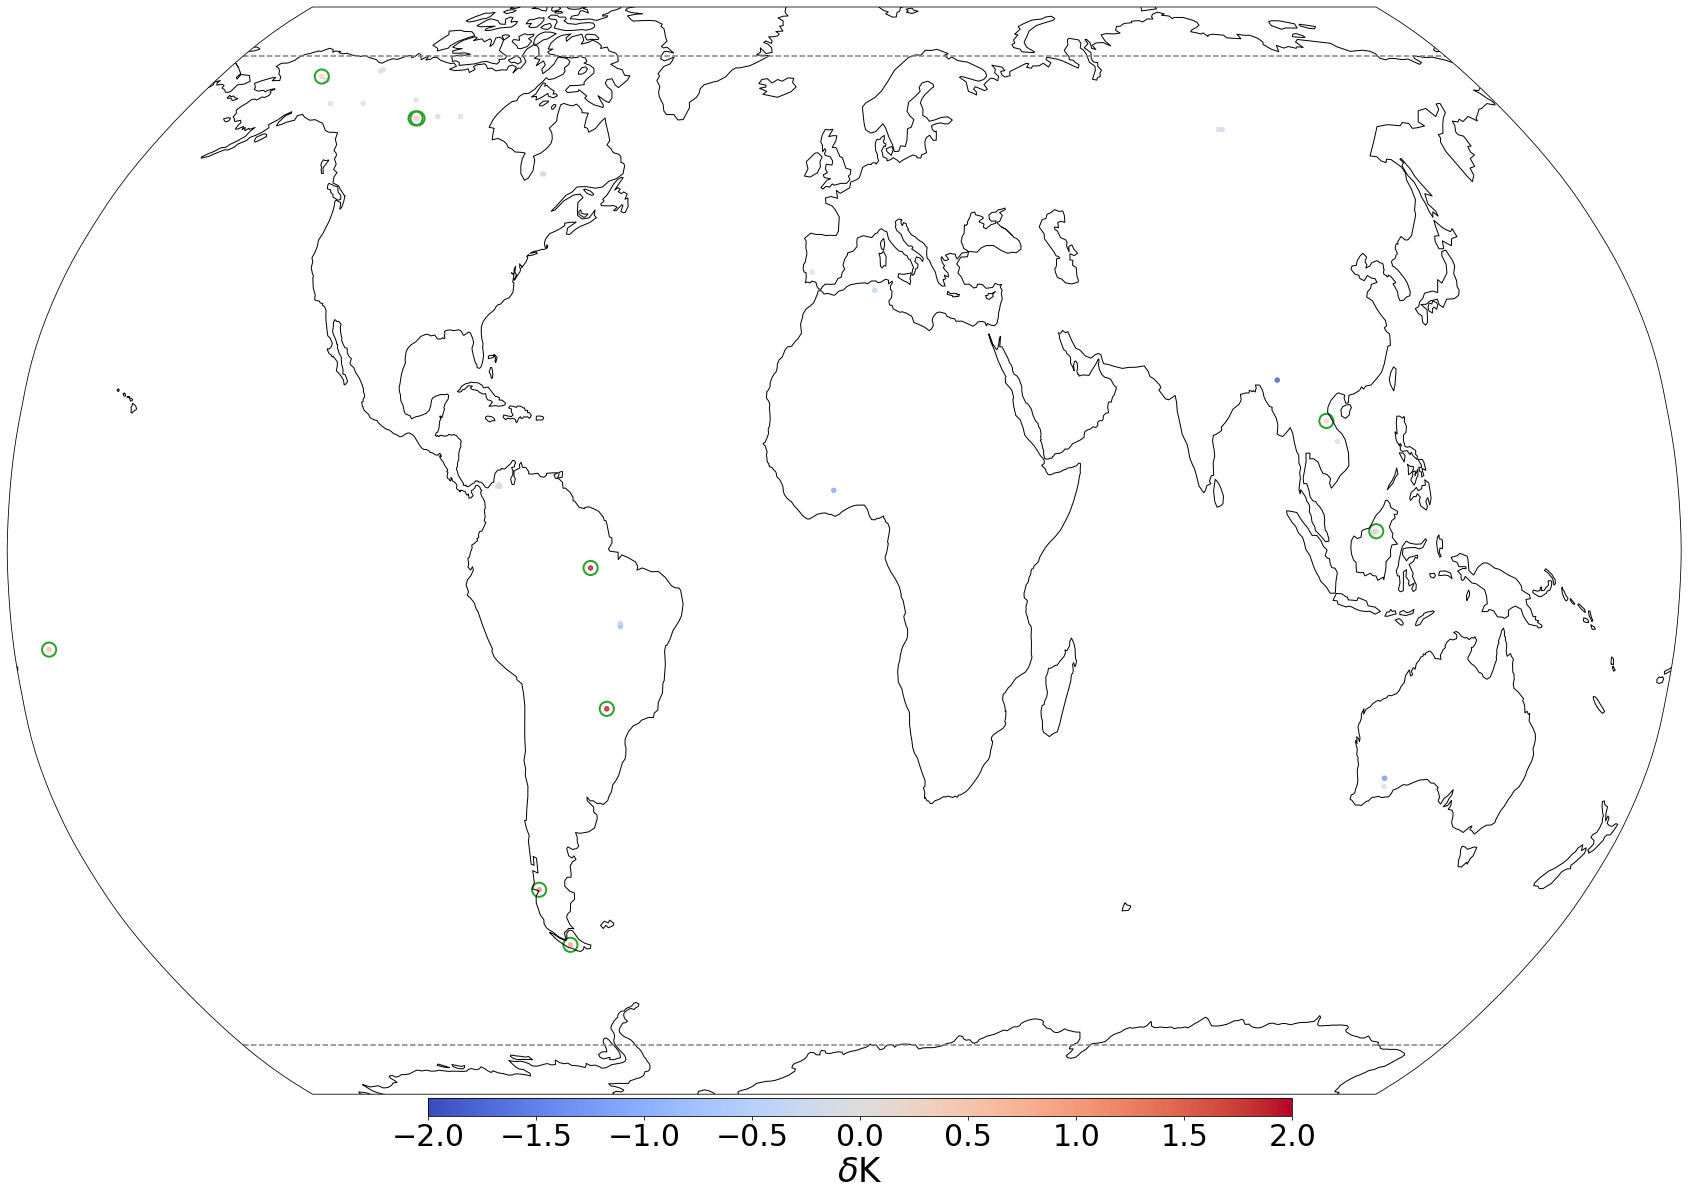

In [84]:
df_lake = df.query('changeAbs_V20V15_clFr > 0.1 & dl_change_is_significant  & not oceanFr_change_is_significant & cvhFr_change_is_significant')
RobinsonPlot(df_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=10)
df_lake.delta.mean()

-0.5417079

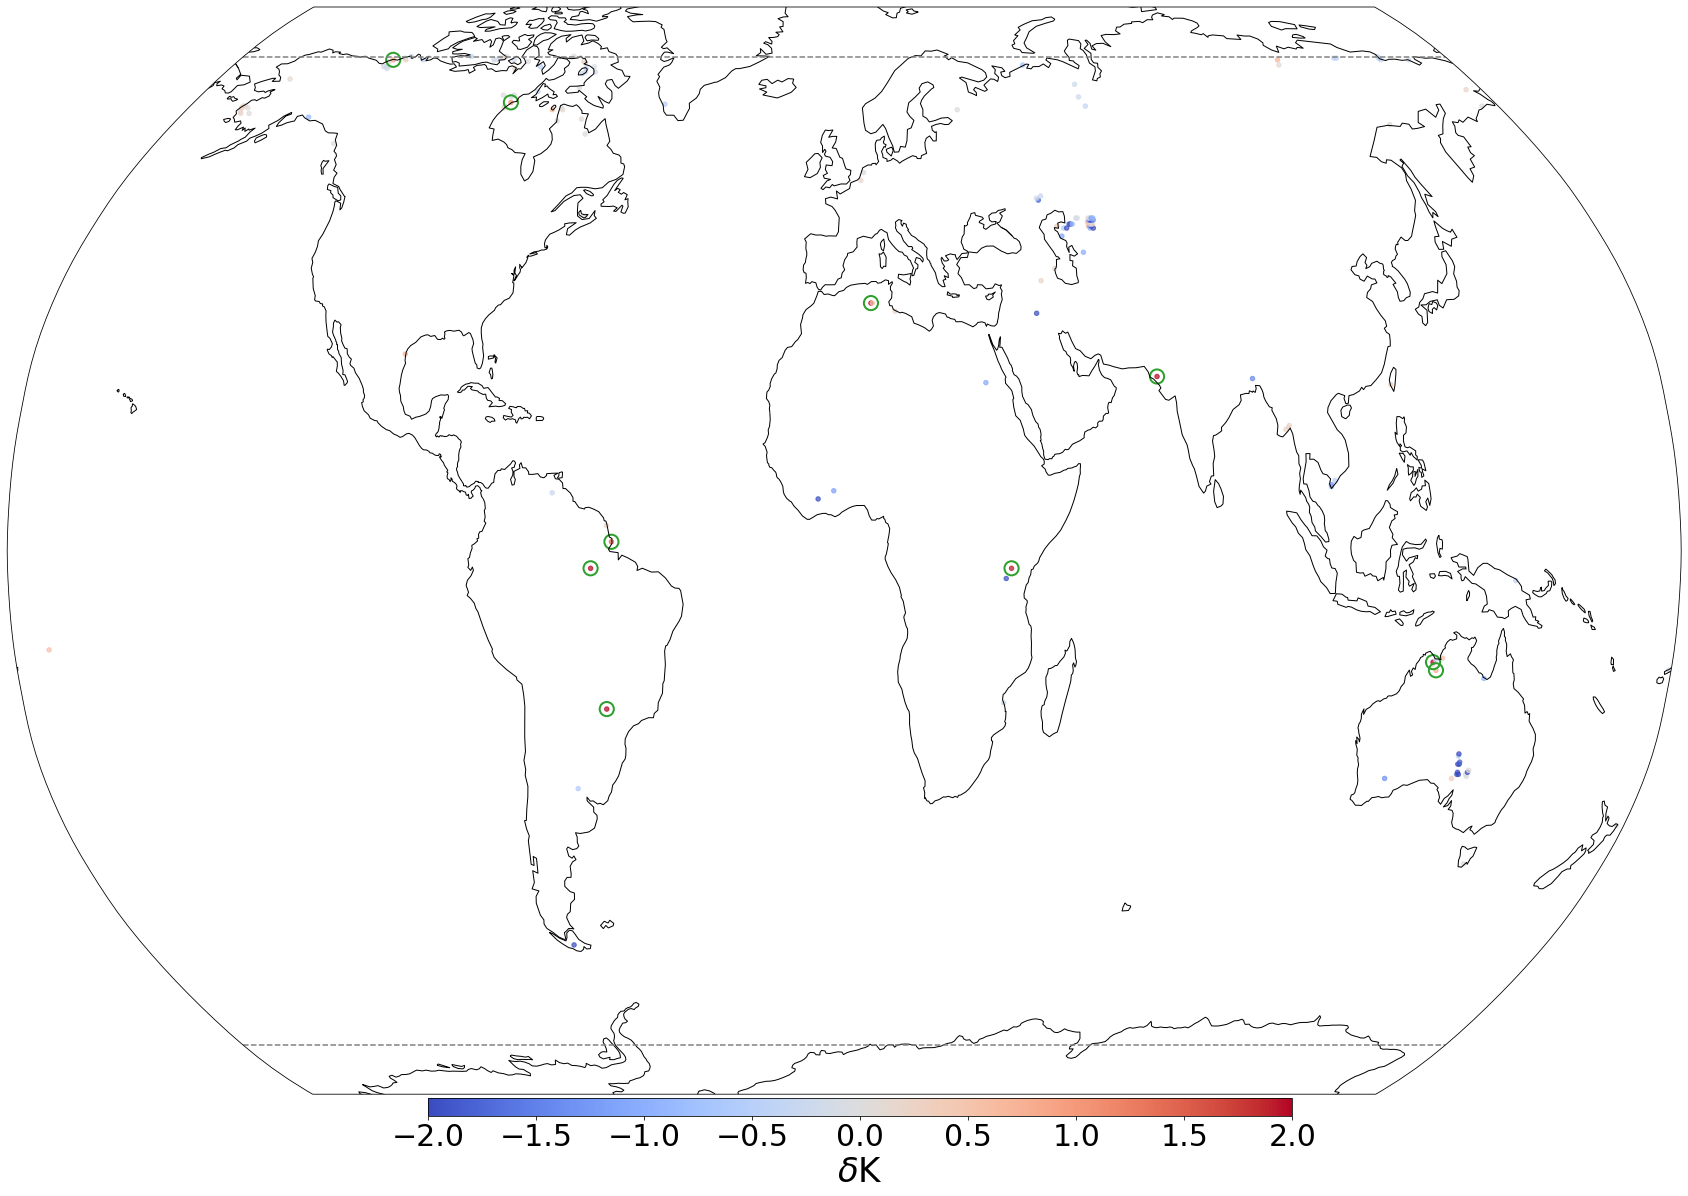

In [87]:
df_lake = df.query('changeAbs_V20V15_clFr > 0.1 & dl_change_is_significant  & not oceanFr_change_is_significant & z_change_is_significant')
RobinsonPlot(df_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=10)
df_lake.delta.mean()

In [62]:
i=1
row = df_ice.sort_values(by=['delta'],ascending=False).iloc[i]

In [63]:
display(row)
display(row.latitude_ERA)
display(row.longitude_ERA)

latitude_ERA                      -49.320823
longitude_ERA                      69.166667
MODIS_LST                         279.357391
V15_prediction                    273.628998
V20_prediction                    270.418213
V20X_prediction                    271.64859
V15_error                           5.905395
V20_error                           9.017347
V20X_error                          7.843897
delta                               3.111953
deltaX                              1.938502
V15_clFr                            0.020383
V15_cvhFr                                0.0
V15_cvlFr                           0.864841
V15_dl                             31.013672
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            3771.574219
V20_clFr                            0.056965
V20_cvhFr                                0.0
V20_cvlFr                           0.304861
V20_dl                             14.499023
V20_oceanF

-49.32082277967856

69.16666666666669